In [2]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
# import PyCO2SYS as pyco2
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
warnings.filterwarnings("ignore")

In [3]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [4]:
var_id = 'dissic'
var_id_2 = 'thetao'
var_id_3 = 'so'
exp_id = 'piControl'
print(var_id, exp_id)

dissic piControl


In [5]:
cat_DIC = col.search(variable_id= 'dissic', experiment_id= exp_id)
cat_DIC.df['source_id'].unique()

array(['GFDL-ESM4', 'GFDL-CM4', 'CNRM-ESM2-1', 'IPSL-CM6A-LR', 'CESM2',
       'CESM2-WACCM', 'CanESM5-CanOE', 'CanESM5', 'MPI-ESM-1-2-HAM',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'GISS-E2-1-G-CC', 'GISS-E2-1-G',
       'MIROC-ES2L', 'NorESM1-F', 'CESM2-WACCM-FV2', 'CESM2-FV2',
       'ACCESS-ESM1-5', 'UKESM1-0-LL', 'MRI-ESM2-0', 'KIOST-ESM',
       'NorESM2-LM', 'CMCC-ESM2', 'IPSL-CM5A2-INCA'], dtype=object)

In [6]:
cat_thetao = col.search(variable_id= 'thetao', experiment_id= exp_id)
cat_thetao.df['source_id'].unique()

array(['GFDL-ESM4', 'GFDL-CM4', 'CNRM-CM6-1', 'GISS-E2-1-G',
       'BCC-CSM2-MR', 'CNRM-ESM2-1', 'IPSL-CM6A-LR', 'AWI-CM-1-1-MR',
       'BCC-ESM1', 'EC-Earth3-LR', 'CanESM5', 'MIROC6', 'CESM2',
       'CESM2-WACCM', 'GISS-E2-1-H', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'EC-Earth3-Veg', 'MPI-ESM-1-2-HAM', 'HadGEM3-GC31-LL',
       'NESM3', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'EC-Earth3',
       'CAMS-CSM1-0', 'MCM-UA-1-0', 'GISS-E2-1-G-CC', 'MIROC-ES2L',
       'UKESM1-0-LL', 'SAM0-UNICON', 'NorCPM1', 'FIO-ESM-2-0',
       'CNRM-CM6-1-HR', 'FGOALS-f3-L', 'E3SM-1-1', 'ACCESS-CM2',
       'GISS-E2-2-G', 'IITM-ESM', 'CESM2-WACCM-FV2', 'CESM2-FV2',
       'FGOALS-g3', 'ACCESS-ESM1-5', 'MRI-ESM2-0', 'HadGEM3-GC31-MM',
       'E3SM-1-1-ECA', 'E3SM-1-0', 'AWI-ESM-1-1-LR', 'CIESM',
       'CAS-ESM2-0', 'NorESM2-LM'], dtype=object)

In [7]:
# exclude two models that dont work quite right
#source_ids = [m for m in cat_DIC.df['source_id'].unique() if m not in ['CMCC-ESM2', 'KIOST-ESM']]
source_ids = ['CanESM5-CanOE', 'CanESM5', 'ACCESS-ESM1-5',
                        'MPI-ESM-1-2-HAM', 'IPSL-CM6A-LR', 'MIROC-ES2L',
                        'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'NorCPM1',
                        'NorESM1-F', 'NorESM2-LM', 'NorESM2-MM', 'GFDL-ESM4']
DICdict = cat_DIC.search(source_id=source_ids).to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'
MIROC-ES2L: No units found


MIROC-ES2L: No units found


In [8]:
thetao_dict = cat_thetao.search(source_id=source_ids).to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


MIROC-ES2L: No units found


In [8]:
def meridionalsection(ax,da,clims=None,title=None):
    im = ax.pcolormesh(da['y'],da['lev'],da)
    if clims is not None:
        im.set_clim(clims)
    ax.set_xlim([-80,60])
    ax.invert_yaxis()
    plt.colorbar(im,ax=ax)
    ax.set_title(title)
    ax.contour(da['y'],da['lev'],DIC,levels=[36,36.4,36.8],colors='w')
    
def meridionalsection_with_sigma2(ax,da,sigma2,clims=None,title=None):
    meridionalsection(ax,da,clims)
    ax.contour(da['y'],da['lev'],sigma2,levels=[36,36.4,36.8],colors='w')
    ax.set_title(title)

In [32]:
thetao_dict

{'CMIP.MPI-M.MPI-ESM1-2-LR.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/Omon/thetao/gn/v20190710/.nan.20190710': <xarray.Dataset>
 Dimensions:      (bnds: 2, lev: 40, time: 12000, vertex: 4, x: 256, y: 220)
 Coordinates:
   * x            (x) float64 1.207 2.424 3.642 4.862 ... 356.3 357.6 358.8 360.0
   * y            (y) float64 -77.24 -76.96 -76.67 -76.37 ... 71.7 71.72 71.73
     lat          (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
   * lev          (lev) float64 6.0 17.0 27.0 37.0 ... 4.67e+03 5.17e+03 5.72e+03
     lev_bounds   (lev, bnds) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
     lon          (y, x) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
   * time         (time) object 1850-01-16 12:00:00 ... 2849-12-16 12:00:00
     time_bounds  (time, bnds) object dask.array<chunksize=(12000, 2), meta=np.ndarray>
     lat_bounds   (y, x, vertex) float64 dask.array<chunksize=(220, 256

Text(0.5, 1.0, 'CanESM5 dissic')

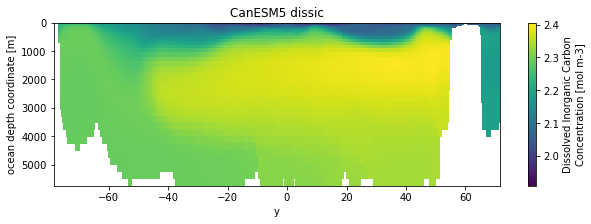

In [10]:
#fig, ax = plt.subplots(figsize=[10,3])
#ds = dset_dict['CMIP.IPSL.IPSL-CM6A-LR.piControl.Omon.gn'].isel(time=0).sel(x=slice(180,200)).mean('x',keep_attrs=True)
#if 'member_id' in ds.dims:
#    ds = ds.isel(member_id=0)
#pco2 = calc_PpCO2(ds)
#sigma2 = calc_sigma2(ds)
#meridionalsection_with_sigma2(ax,pco2,sigma2,clims=[500,2500],title=ds.attrs['intake_esm_dataset_key'])
fig, ax = plt.subplots(figsize=[10,3])
DIC = DICdict['CMIP.CCCma.CanESM5.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/dissic/gn/v20190429/.nan.20190429'].isel(time=1200).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DIC.dissic.plot()
plt.gca().invert_yaxis()
ax.set_title(DIC.attrs['source_id'] + ' ' + DIC.attrs['variable_id'])

In [70]:
abc = 'CMIP.CCCma.CanESM5.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/thetao/gn/v20190306/.nan.20190306'

Text(0.5, 1.0, 'CanESM5 thetao')

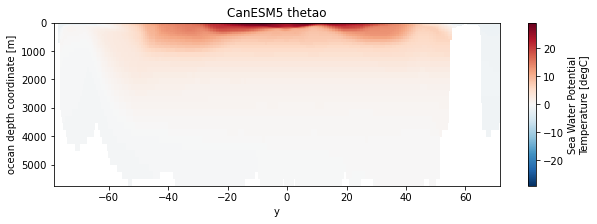

In [71]:
fig2, ax2 = plt.subplots(figsize=[10,3])
THETAO = thetao_dict[abc].isel(time=1200).sel(x=slice(180,200)).mean('x', keep_attrs=True)
THETAO.thetao.plot()
plt.gca().invert_yaxis()
ax2.set_title(THETAO.attrs['source_id'] + ' ' + THETAO.attrs['variable_id'])


In [27]:
dic = DIC['dissic']
DIC.dissic.head()

<xarray.DataArray 'dissic' (lev: 5, y: 5)>
dask.array<getitem, shape=(5, 5), dtype=float32, chunksize=(5, 5), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -78.39 -78.19 -77.98 -77.77 -77.56
  * lev      (lev) float64 3.047 9.454 16.36 23.9 32.21
    time     object 5301-01-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    history:        mltby1em3
    long_name:      Dissolved Inorganic Carbon Concentration
    original_name:  DIC
    standard_name:  mole_concentration_of_dissolved_inorganic_carbon_in_sea_w...
    units:          mol m-3

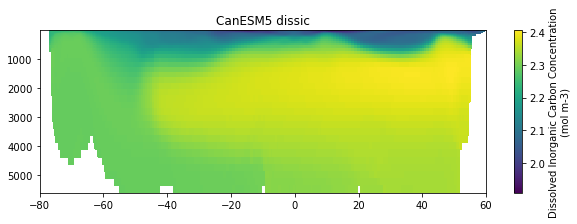

In [87]:
fig, ax = plt.subplots(figsize=[10,3])
im = ax.pcolormesh(DIC['y'],DIC['lev'],DIC.dissic)
#im = ax.contourf(DIC['y'],DIC['lev'],DIC.dissic)
#im.set_clim([1.84, 2.48])
ax.set_xlim([-80,60])
ax.invert_yaxis()
cbar = plt.colorbar(im,ax=ax)
cbar.set_label(DIC.dissic.attrs['long_name']+'\n('+DIC.dissic.attrs['units']+')')
#ax.contour(DIC['y'],DIC['lev'],DIC.dissic,colors='w')
ax.set_title(DIC.attrs['source_id'] + ' ' + DIC.attrs['variable_id'])
fig.savefig('plot.png')




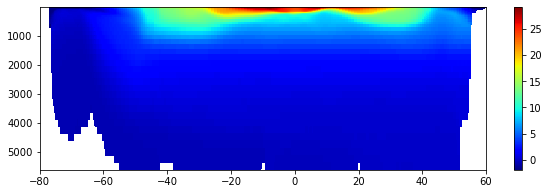

In [82]:
fig1, ax1 = plt.subplots(figsize=[10,3])
im1 = ax1.pcolormesh(THETAO['y'],THETAO['lev'],THETAO.thetao, cmap='jet')
#im = ax.contourf(DIC['y'],DIC['lev'],DIC.dissic)
#im1.set_clim([-5, 30])
ax1.set_xlim([-80,60])
ax1.invert_yaxis()
plt.colorbar(im1)
#ax.contour(DIC['y'],DIC['lev'],DIC.dissic,colors='w')


#plt.imshow(im, cmap='RdBu');

